In [1]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.font_manager import FontProperties  
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\DB'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\DB\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\DB\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
font = FontProperties(fname=r"simsun.ttf", size=14)  
matplotlib.rcParams['axes.unicode_minus'] =False
mpl.rcParams['font.sans-serif'] = ['SimHei']
tick_spacing = 4

# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)

In [114]:
# helper -- days
def select_days(s_d, e_d, wkd, gap):
    days = []
    flag = 0
    sdt = datetime.datetime.strptime(s_d, '%Y-%m-%d').date()
    edt = datetime.datetime.strptime(e_d, '%Y-%m-%d').date()
    for day in DTBS['D']['day']:
        cdt =  datetime.datetime.strptime(day, '%Y-%m-%d').date()
        if cdt >= sdt:
            flag = 1
        
        if cdt == edt:
            days.append(day)
            break
        
        if cdt > edt:
            break 
            
        if flag == 1:
            days.append(day)
            
    s_days = []
    count = 0
    for day in days:
        if day in DTBS['D'][wkd]:
            if count % gap == 0:
                s_days.append(day)
                
            count += 1
    
    
    return s_days

f20wm = select_days('2020-01-01', '2020-06-30', 'mon', 1)
f20fm = select_days('2020-01-01', '2020-06-30', 'mon', 2)
s20wm = select_days('2020-07-01', '2020-12-31', 'mon', 1)
s20fm = select_days('2020-07-01', '2020-12-31', 'mon', 2)
f21wm = select_days('2021-01-01', '2021-06-30', 'mon', 1)
f21fm = select_days('2021-01-01', '2021-06-30', 'mon', 2)
s21wm = select_days('2021-07-01', '2021-12-31', 'mon', 1)
s21fm = select_days('2021-07-01', '2021-12-31', 'mon', 2)
f22wm = select_days('2022-01-01', '2022-06-30', 'mon', 1)
f22fm = select_days('2022-01-01', '2022-06-30', 'mon', 2)
s22wm = select_days('2022-07-01', '2022-12-31', 'mon', 1)
s22fm = select_days('2022-07-01', '2022-12-31', 'mon', 2)
f23wm = select_days('2023-01-01', '2023-03-29', 'mon', 1)
f23fm = select_days('2023-01-01', '2023-03-29', 'mon', 2)
a20wm = select_days('2020-01-01', '2020-12-31', 'mon', 1)
a20fm = select_days('2020-01-01', '2020-12-31', 'mon', 2)
a21wm = select_days('2021-01-01', '2021-12-31', 'mon', 1)
a21fm = select_days('2021-01-01', '2021-12-31', 'mon', 2)
a22wm = select_days('2022-01-01', '2022-12-31', 'mon', 1)
a22fm = select_days('2022-01-01', '2022-12-31', 'mon', 2)

hywm = [f20wm, s20wm, f21wm, s21wm, f22wm, s22wm, f23wm]
hyfm = [f20fm, s20fm, f21fm, s21fm, f22fm, s22fm, f23fm]


In [83]:
# helper -- others
def select_group(nm, dt, codes, grp):
    select = []
    if nm == 'id':
        for code in codes:
            if DTBS['B'][code]['cat1'] == grp:
                select.append(code)
    elif nm == 'pr':
        for code in codes:
            if DTBS['A'][code][dt]['dp'] >= grp[0] and DTBS['A'][code][dt]['dp'] <= grp[1]:
                select.append(code)
                
    else:
        for code in codes:
            if DTBS['B'][code]['cat1']  == grp[0]:
                if DTBS['A'][code][dt]['dp'] >= grp[1][0] and DTBS['A'][code][dt]['dp'] <= grp[1][1]:
                    select.append(code)
    return select


def transform_group(grps):
    if len(grps) == 1:
        return grps[0]
    else:
        grp = ['idpr', []]
        for cd1 in grps[0][1]:
            for cd2 in grps[1][1]:
                grp[1].append((cd1, cd2))
        
        return grp
    

def select_existing(dt):
    exist = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            exist.append(code)
            
    return exist

def select_condition(codes, dt, fcd):
    satisfy = []
    for code in codes:
        if DTBS['A'][code][dt][fcd[0]] <= fcd[2] and DTBS['A'][code][dt][fcd[0]] >= fcd[1]:
                satisfy.append(code)
    return satisfy

def takeSecond(elem):
    return elem[1]


def retrieve_low_nodes(codes,dt,num):
    dl_rank = []
    for code in codes:
        if DTBS['A'][code][dt]['dl'] != 999:
            dl_rank.append((code, DTBS['A'][code][dt]['dl']))
    
    dl_rank.sort(key=takeSecond)
    low = dl_rank[0:num]
    return [i[0] for i in low]


idts = [['农林牧渔(2021)', '基础化工(2021)', '美容护理(2021)', '通信(2021)', '非银金融(2021)', '电力设备(2021)', '汽车(2021)', '电子(2021)'], ['家用电器(2021)', '基础化工(2021)', '建筑材料(2021)', '建筑装饰(2021)', '机械设备(2021)', '商贸零售(2021)', '计算机(2021)', '国防军工(2021)', '钢铁(2021)', '传媒(2021)'], ['汽车(2021)', '交通运输(2021)', '农林牧渔(2021)', '煤炭(2021)', '有色金属(2021)', '商贸零售(2021)', '机械设备(2021)', '钢铁(2021)', '电力设备(2021)', '基础化工(2021)'], ['电力设备(2021)', '有色金属(2021)', '交通运输(2021)', '钢铁(2021)', '通信(2021)', '汽车(2021)', '基础化工(2021)', '轻工制造(2021)', '国防军工(2021)', '医药生物(2021)'], ['有色金属(2021)', '机械社保(2021)', '基础化工(2021)', '农林牧渔(2021)', '汽车(2021)', '交通运输(2021)', '国防军工(2021)', '医药生物(2021)', '通信(2021)', '电力设备(2021)'], ['有色金属(2021)', '农林牧渔(2021)', '汽车(2021)', '电力设备(2021)', '公用事业(2021)', '社会服务(2021)', '食品饮料(2021)', '医药生物(2021)', '轻工制造(2021)', '建筑材料(2021)'], ['建筑材料(2021)', '建筑装饰(2021)', '国防军工(2021)', '计算机(2021)', '通信(2021)', '食品饮料(2021)', '社会服务(2021)', '纺织服饰(2021)', '交通运输(2021)', '轻工制造(2021)']]

In [5]:
# plot

def plot_profit(days, profit, market = DTBS['C']):
    plt.figure(figsize=(80,60))

    fig, ax = plt.subplots(1,1)
    plt.plot(days[1:], profit, linestyle='solid',label='双低5周换仓')
    i_x = [days[1], days[-1]]

    market_gain = (market['zi'][days[-1]]-market['zi'][days[0]])/(market['zi'][days[0]])
    i_y = [0, market_gain]
    plt.plot(i_x, i_y, linestyle='solid',label='中正转债指数')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')

    # 'dashed'
    #‘dotted'
    # 'dashdot'
    # 'solid'

    
    plt.legend(fontsize = 'x-small')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('收益率/%')
    tt = '收益率'
    plt.title(tt)
    plt.savefig(tt, dpi=300)
    plt.show()
    print("Final gain", profit[-1], ',',"Market gain", market_gain)


In [6]:
# statistics

def win_stat(res):
    print("Max profit", max(res), ", Max loss", min(res))
    wins = []
    win = 0
    count = 0
    winm = 0
    winsm  = []
    summ = 0
    
    for i in res:
        if i >= 0:
            win += 1
            wins.append(True)
        else:
            wins.append(False)
        
        summ += i
        if (count + 1) % 4 == 0:
            if summ >= 0:
                winm += 1
                winsm.append(True)
            else:
                winsm.append(False)
                
            summ = 0
            
        count += 1
    win_rate = win/len(res)
    winm_rate = winm/len(winsm)
    print("Weekly win rate & details", win_rate, ", ", wins)
    print("Monthly win rate & details", winm_rate,", ", winsm)

    

In [58]:
# calculate
def cumulative_profit(days, grp_cd, flt_cd, dl):
    cm_profit = []
    one_profit = []
    all_select = []
    sum_profit = 0
    
    for i in range(len(days)): 
        if i+1 == len(days):
            exist = select_existing(days[i])
            
            
        else: 
            exist_tr = select_existing(days[i])
            exist_nr = select_existing(days[i+1])
            exist =list(set(exist_tr).intersection(set(exist_nr)))

        select = exist.copy()
        candidate = []
        if grp_cd != []:
            grp = transform_group(grp_cd)
            for cd in grp[1]:
                select = exist.copy()
                select = select_group(grp[0], days[i], select, cd)
                for fcd in flt_cd:
                    select = select_condition(select, days[i], fcd)
                if dl > 0:
                    select = retrieve_low_nodes(select, days[i], dl)                       
                for cd in select:
                    candidate.append(cd)
                            

        
        else: 
            for fcd in flt_cd:
                select = select_condition(select, days[i], fcd)
            if dl > 0:
                select = retrieve_low_nodes(select, days[i], dl)
                
            candidate = select.copy()    
        
#         print(candidate, days[i])
        all_select.append(candidate)
    
    
        if i >= 1:
        
            tr = 0
            lr = 0
#
            for cd in all_select[i-1]:
                tr += DTBS['A'][cd][days[i]]['dp']
                lr += DTBS['A'][cd][days[i-1]]['dp']
        
            profit = ((tr - lr)/ lr)
            one_profit.append(profit)

            sum_profit += profit

                
            cm_profit.append(sum_profit)
#             print("Availble No.", len(all_codes[i-1]))

#     print(profit)
    return cm_profit, one_profit    


Max profit 0.02033031676839239 , Max loss -0.02166791596413352
Weekly win rate & details 0.5 ,  [True, False, False, True, False, False, True, True, False, True]
Monthly win rate & details 0.5 ,  [False, True]


<Figure size 5760x4320 with 0 Axes>

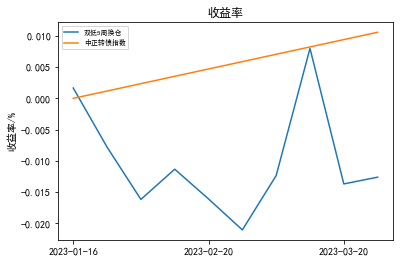

Final gain -0.012602860693028552 , Market gain 0.010569763975612713


-0.012602860693028552

In [93]:
idlst = ['农林牧渔(2021)', '基础化工(2021)', '美容护理(2021)', '通信(2021)', '非银金融(2021)', '电力设备(2021)', '汽车(2021)', '电子(2021)']
prlst = [[110,120], [120,130], [130,140]]
grp_cd = [['id', idlst], ['pr', prlst]]
grp_cd = [['id', idlst]]
grp_cd = [['pr', prlst]]
grp_cd = []
fil_cd = [['dp',100,10000], ['trt',2,10], ['ytm',0.5,100], ['bl',0.3,7]]
fil_cd = []
dl = 5
tm = f21wm
cm_profit, one_profit = cumulative_profit(tm, grp_cd, fil_cd, dl)
win_stat(one_profit)
plot_profit(tm, cm_profit)
cm_profit[-1]

In [168]:
grp_cd = []
fil_cd = [['dp',100,10000]]
fil_cd = [['dp',100,10000], ['trt',2,10], ['ytm',0.5,100], ['bl',0.3,7]]





fil_cd = [['trt',2,10]]
fil_cd = [['trt',2,10]]
fil_cd = [['bl',0.3,7]]
fil_cd = [['ytm',0.5,100]]
dl = 20
with open('log.txt','a') as f:
    for i in range(len(hywm)):
        cm_profit, one_profit = cumulative_profit(hywm[i], grp_cd, fil_cd, dl)
        print(cm_profit[-1], file=f)


    print("\n", file=f)

In [103]:
,

0
1
2
3
4
5
6


['2020-07-06',
 '2020-07-13',
 '2020-07-20',
 '2020-07-27',
 '2020-08-03',
 '2020-08-10',
 '2020-08-17',
 '2020-08-24',
 '2020-08-31',
 '2020-09-07',
 '2020-09-14',
 '2020-09-21',
 '2020-09-28',
 '2020-10-12',
 '2020-10-19',
 '2020-10-26',
 '2020-11-02',
 '2020-11-09',
 '2020-11-16',
 '2020-11-23',
 '2020-11-30',
 '2020-12-07',
 '2020-12-14',
 '2020-12-21',
 '2020-12-28']

In [9]:
import os,random,time
f=open(os.getcwd()+r"/menu.txt","r",encoding="utf-8")
a=f.readlines()
li=[]
for aa in a:
    li.append(aa.strip())
print("程序正在从列表"+str(li)+"中进行随机选择，请稍后")
time.sleep(1)
print("选择结果为："+random.choice(li))
os.system("pause")

程序正在从列表['老乡鸡', '自选']中进行随机选择，请稍后
选择结果为：自选


0

In [11]:
a = [1,2]
b = [1,3]

In [13]:
a * b

TypeError: can't multiply sequence by non-int of type 'list'